In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/motionsense-dataset/data_subjects_info.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/__MACOSX/A_DeviceMotion_data/dws_1/._sub_1.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/__MACOSX/A_DeviceMotion_data/jog_9/._sub_4.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/__MACOSX/A_DeviceMotion_data/jog_9/._sub_5.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/__MACOSX/A_DeviceMotion_data/wlk_7/._sub_13.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_16.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_18.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_3.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_12.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_1.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_4

In [2]:
import os
import numpy as np
import pandas as pd

# change these following three lines only
subject_data_file = 'data_subjects_info.csv'
data_dir = '/kaggle/input/motionsense-dataset/A_DeviceMotion_data'

os.chdir(data_dir)
os.chdir(os.pardir)

def get_all_dataset_paths(input_dir) -> []:
    input_files = []
    for dirs, subdirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.csv'):
                input_files.append(os.path.join(dirs, file))
    return input_files

def load_whole_dataframe_from_paths(paths, meta) -> pd.DataFrame:
    
    df = pd.DataFrame()

    for p in paths:
        c_dir, c_file = p.split('/')[-2], p.split('/')[-1]
        c_cat, c_ses = c_dir.split('_')[-2], c_dir.split('_')[-1]
        c_sub = c_file.split('_')[-1].split('.')[-2]
        
        tdf = pd.read_csv(p, encoding = "utf-8")
        tdf = tdf.assign(subject_id = int(c_sub))
        tdf = tdf.assign(session_id = int(c_ses))
        tdf = tdf.assign(category = str(c_cat))
        tdf = tdf.assign(age = int(meta.age[int(c_sub) - 1]))
        tdf = tdf.assign(gender = int(meta.gender[int(c_sub) - 1]))
        tdf = tdf.assign(height = int(meta.height[int(c_sub) - 1]))
        tdf = tdf.assign(weight = int(meta.weight[int(c_sub) - 1]))

        df = pd.concat([df, tdf])
    
    df.reset_index(drop=True, inplace=True)
    return df

subject_data_frame = pd.DataFrame(pd.read_csv(subject_data_file, encoding = "utf-8"))
all_dataset_paths = get_all_dataset_paths(data_dir)
data_frame = load_whole_dataframe_from_paths(all_dataset_paths, subject_data_frame)


In [3]:
df = data_frame.copy() #making a copy of original dataframe
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('subject_id', axis=1, inplace=True)
df.drop('session_id', axis=1, inplace=True)
df.drop('age', axis=1, inplace=True)
df.drop('gender', axis=1, inplace=True)
df.drop('height', axis=1, inplace=True)
df.drop('weight', axis=1, inplace=True)
df

,category,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,dws,1.044129,-1.364544,-0.762006,0.177020,0.978805,-0.102928,-0.055552,0.296486,-0.517680,0.277799,0.073975,-0.005989
1,dws,1.033699,-1.374970,-0.777007,0.167157,0.980887,-0.099540,-0.160723,0.148822,-0.528907,0.209674,-0.051886,0.032646
2,dws,1.020201,-1.385414,-0.792103,0.157058,0.982866,-0.096422,-0.125106,0.032462,-0.498599,0.164369,-0.157625,0.108598
3,dws,0.991317,-1.392669,-0.820281,0.148236,0.984177,-0.097010,0.135182,-0.113719,-0.398317,0.138705,-0.194550,0.106623
4,dws,0.938219,-1.393323,-0.871891,0.142361,0.984293,-0.104360,0.475710,-0.107196,-0.194053,0.141697,-0.141046,0.052633
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412860,wlk,-0.023793,-0.999631,-0.784959,-0.012861,0.841271,-0.540444,0.047839,-0.205053,-0.354167,0.114348,0.727546,0.388558
1412861,wlk,-0.043543,-1.004392,-0.804742,-0.023357,0.843836,-0.536076,-0.498880,0.069946,-0.452342,-0.366063,0.680807,0.583729
1412862,wlk,-0.040952,-1.016429,-0.808555,-0.021550,0.850234,-0.525946,-0.519771,0.242518,0.098493,-0.240245,0.207811,0.528601
1412863,wlk,-0.034956,-1.023650,-0.799503,-0.018182,0.854013,-0.519916,-0.363679,-0.225310,0.272167,-0.199577,-0.125375,0.559192


In [4]:
from sklearn.preprocessing import LabelEncoder

lEncoder = LabelEncoder()
labels = lEncoder.fit(df.category)
df['code'] = lEncoder.transform(df.category)
df.drop('category', axis=1, inplace=True)
df

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,code
0,1.044129,-1.364544,-0.762006,0.177020,0.978805,-0.102928,-0.055552,0.296486,-0.517680,0.277799,0.073975,-0.005989,0
1,1.033699,-1.374970,-0.777007,0.167157,0.980887,-0.099540,-0.160723,0.148822,-0.528907,0.209674,-0.051886,0.032646,0
2,1.020201,-1.385414,-0.792103,0.157058,0.982866,-0.096422,-0.125106,0.032462,-0.498599,0.164369,-0.157625,0.108598,0
3,0.991317,-1.392669,-0.820281,0.148236,0.984177,-0.097010,0.135182,-0.113719,-0.398317,0.138705,-0.194550,0.106623,0
4,0.938219,-1.393323,-0.871891,0.142361,0.984293,-0.104360,0.475710,-0.107196,-0.194053,0.141697,-0.141046,0.052633,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412860,-0.023793,-0.999631,-0.784959,-0.012861,0.841271,-0.540444,0.047839,-0.205053,-0.354167,0.114348,0.727546,0.388558,5
1412861,-0.043543,-1.004392,-0.804742,-0.023357,0.843836,-0.536076,-0.498880,0.069946,-0.452342,-0.366063,0.680807,0.583729,5
1412862,-0.040952,-1.016429,-0.808555,-0.021550,0.850234,-0.525946,-0.519771,0.242518,0.098493,-0.240245,0.207811,0.528601,5
1412863,-0.034956,-1.023650,-0.799503,-0.018182,0.854013,-0.519916,-0.363679,-0.225310,0.272167,-0.199577,-0.125375,0.559192,5


In [5]:
from sklearn.model_selection import train_test_split

x_columns = df.iloc[:, 0:12]
y_columns = df.iloc[:, 12:13]

trainx, testx, trainy, testy = train_test_split(x_columns, y_columns, test_size=0.2, shuffle=False)
assert(len(trainx) == len(trainy))

In [6]:
from scipy.stats import mode

WINDOW_LENGTH = 150
STRIDE_LENGTH = 10
NUM_CLASSES = 6
NUM_FEATURES = 12
BATCH_SIZE = 100
EPOCHS_SIZE = 10

def sequence_generator(x, y, length, stride):
    seq_x = []
    seq_y = []
    data_length = len(x)

    for i in range(0, data_length - length + 1, stride):
        input_sequence = x.iloc[i : i + length]
        target_sequence = y.iloc[i : i + length]
        target_mode = mode(target_sequence.values)[0][0]
        seq_x.append(input_sequence)
        seq_y.append(target_mode)
    return np.array(seq_x), np.array(seq_y)

tx, ty = sequence_generator(trainx, trainy, WINDOW_LENGTH, STRIDE_LENGTH)
vx, vy = sequence_generator(testx, testy, WINDOW_LENGTH, STRIDE_LENGTH)

In [7]:
from keras.utils import to_categorical


tty = to_categorical(ty, num_classes=NUM_CLASSES)
vvy = to_categorical(vy, num_classes=NUM_CLASSES)

In [10]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout, Bidirectional, BatchNormalization

model = Sequential()
model.add(Bidirectional(GRU(6, return_sequences=True), input_shape=(WINDOW_LENGTH, NUM_FEATURES)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Bidirectional(GRU(12, return_sequences=True)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(GRU(12))
model.add(Dropout(0.2))
model.add(Dense(NUM_CLASSES, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_2 (Bidirectional) │ (None, 150, 12)        │           720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 150, 12)        │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 150, 12)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 150, 24)        │         1,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 150, 24)        │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 150, 24)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ (None, 12)             │         1,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            78 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,182 (16.34 KB)

 Trainable params: 4,110 (16.05 KB)

 Non-trainable params: 72 (288.00 B)

In [11]:
history = model.fit(tx, tty, epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE,validation_data=(vx, vvy))

Epoch 1/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 48s 35ms/step - accuracy: 0.7026 - loss: 0.8228 - val_accuracy: 0.8606 - val_loss: 0.4700
Epoch 2/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - accuracy: 0.9765 - loss: 0.1062 - val_accuracy: 0.8984 - val_loss: 0.4425
Epoch 3/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.9866 - loss: 0.0584 - val_accuracy: 0.8859 - val_loss: 0.5195
Epoch 4/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - accuracy: 0.9896 - loss: 0.0428 - val_accuracy: 0.9096 - val_loss: 0.4635
Epoch 5/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 41s 36ms/step - accuracy: 0.9897 - loss: 0.0423 - val_accuracy: 0.9092 - val_loss: 0.4769
Epoch 6/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 38s 34ms/step - accuracy: 0.9928 - loss: 0.0283 - val_accuracy: 0.8871 - val_loss: 0.6131
Epoch 7/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - accuracy: 0.9929 - loss: 0.0258 - val_accuracy: 0.8954 - val_loss: 0.5907
Epoch 8/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 40s 36ms/step - accuracy: 0.9938 -

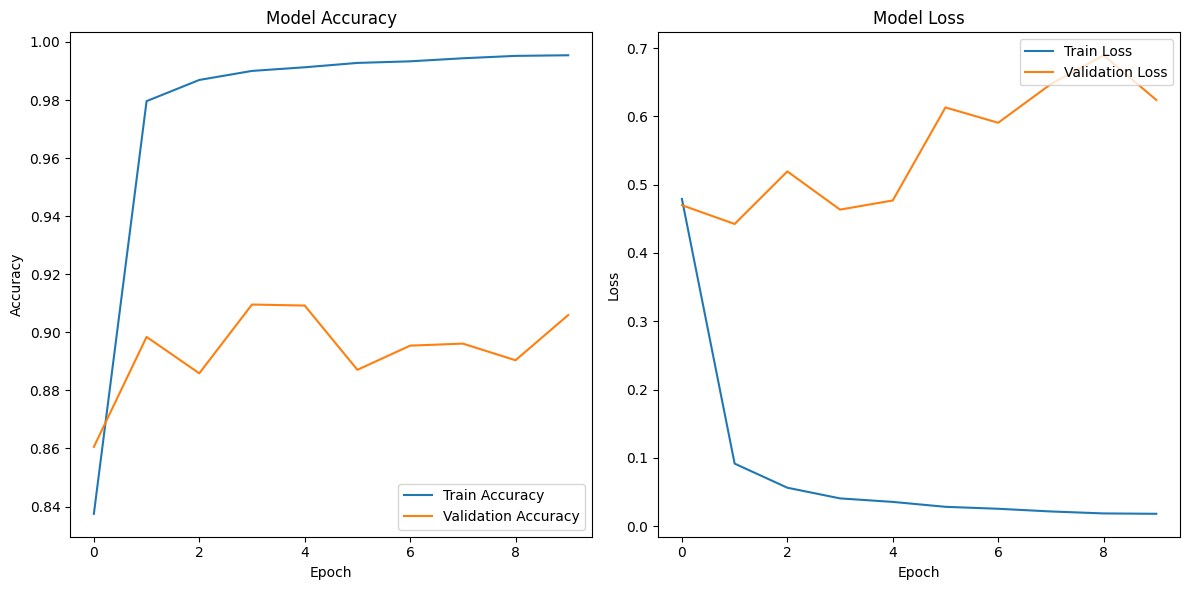

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Display the plots
plt.tight_layout()
plt.show()


In [13]:
model.evaluate(vx, vvy, batch_size=BATCH_SIZE)

283/283 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9147 - loss: 0.5571


[0.6241270899772644, 0.9059590101242065]